# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Naufal Arsapradhana
- **Email:** naufalarsa27@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1477

# Menentukan Pertanyaan Bisnis

-  Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan?

# Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

**Insight**:
Terdapat beberapa library yang akan digunakan, di antaranya:
* pandas untuk memanipulasi data dan analisis
* numpy untuk komputasi numerikal
* matplotlib untuk visualisasi data
* seaborn untuk visualisasi data statistikal
* streamlit untuk mengembangkan dashboard



# Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Data-Analytics/Bike-Sharing/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Data-Analytics/Bike-Sharing/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Kode di atas bertujuan untuk menghubungkan Google Colab dengan Google Drive. Kemudian menyimpan dataset berekstensi csv tersebut pada variabel **day_df** dan **hour_df**.

**Insight:**
- Pada dataset **day.csv** terdapat 731 baris dan 16 kolom
- Pada dataset **hour.csv** terdapat 17.378 baris dengan 17 kolom

### Assessing Data

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:** Tidak terdapat missing values pada kedua dataset.

In [ ]:
duplicated_dd = day_df.duplicated().sum()
print("Jumlah duplikasi data:", duplicated_dd)

Jumlah duplikasi data: 0


In [ ]:
duplicated_dh = hour_df.duplicated().sum()
print("Jumlah duplikasi data:", duplicated_dh)

Jumlah duplikasi data: 0


**Insight:** Tidak terdapat duplikasi data pada kedua dataset.


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** Perlu dilakukan perubahan tipe data pada kolom dteday menjadi datetime.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** Tidak ada keanehan pada perhitungan data statistika masing-masing dataset.

In [ ]:
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df["cnt"] < lower_bound) | (day_df["cnt"] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 0


In [ ]:
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hour_df[(hour_df["cnt"] < lower_bound) | (hour_df["cnt"] > upper_bound)]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 505


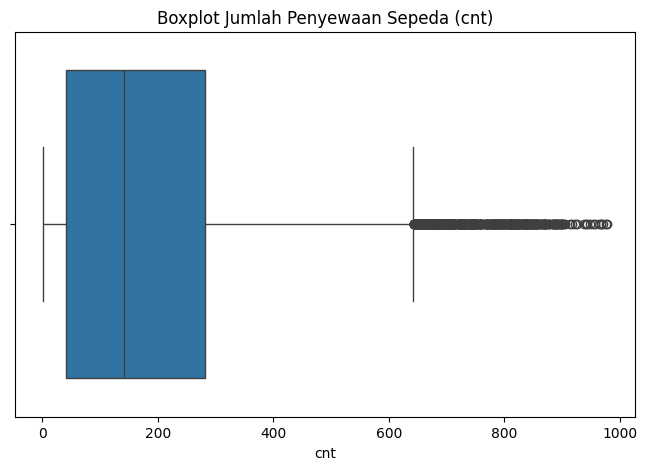

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda (cnt)")
plt.show()

**Insight:** Terdapat 505 data outlier pada dataset hour.csv, namun hal ini merupakan data yang wajar karena terjadi padajam sibuk.

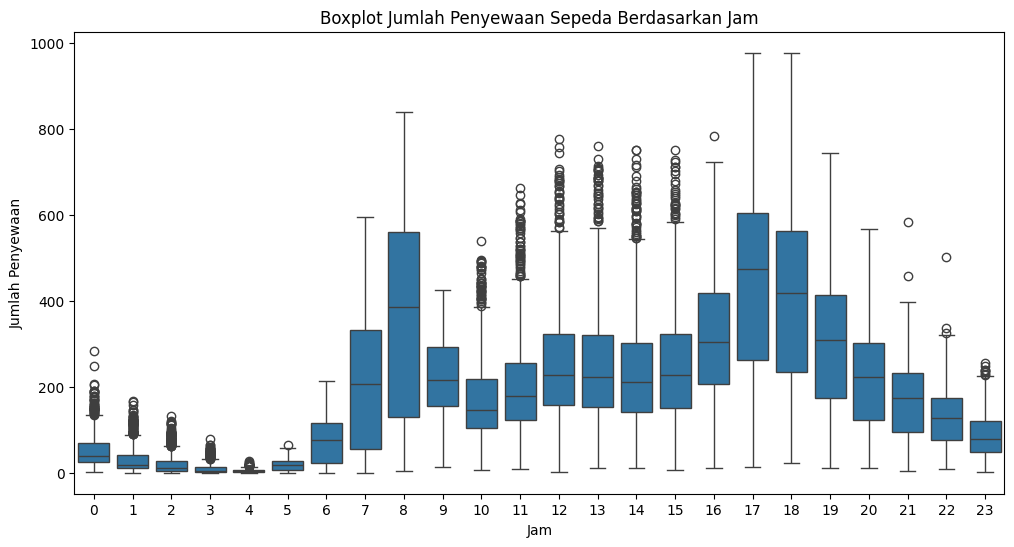

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="hr", y="cnt", data=hour_df)
plt.title("Boxplot Jumlah Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

In [ ]:
print(day_df["weathersit"].unique())

[2 1 3]


**Insight:** Terdapat kemungkinan bahwa tidak ada penyewa yang hanya menyewa pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

In [ ]:
print(f"Min dan Max Temperature: {day_df['temp'].min()}, {day_df['temp'].max()}")
print(f"Min dan Max Humidity: {day_df['hum'].min()}, {day_df['hum'].max()}")
print(f"Min dan Max Windspeed: {day_df['windspeed'].min()}, {day_df['windspeed'].max()}")

Min dan Max Temperature: 0.0591304, 0.861667
Min dan Max Humidity: 0.0, 0.9725
Min dan Max Windspeed: 0.0223917, 0.507463


In [ ]:
print(f"Min dan Max Temperature: {hour_df['temp'].min()}, {hour_df['temp'].max()}")
print(f"Min dan Max Humidity: {hour_df['hum'].min()}, {hour_df['hum'].max()}")
print(f"Min dan Max Windspeed: {hour_df['windspeed'].min()}, {hour_df['windspeed'].max()}")

Min dan Max Temperature: 0.02, 1.0
Min dan Max Humidity: 0.0, 1.0
Min dan Max Windspeed: 0.0, 0.8507


**Insight:** Data Temperature, Humidity, dan Windspeed berada pada rentang yang benar, yaitu 0-1.

In [ ]:
zero_rentals = day_df[day_df["cnt"] == 0]
print(f"Jumlah hari dengan 0 penyewaan: {len(zero_rentals)}")

Jumlah hari dengan 0 penyewaan: 0


**Insight:** Tidak ada hari tanpa penyewaan berarti data normal.


### Cleaning Data

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:** Proses ini bertujuan untuk mengubah tipe data pada kolom **dteday** menjadi **datetime**

# Exploratory Data Analysis (EDA)

## Analisis Musim dan Cuaca

In [ ]:
day_df.groupby('season')['cnt'].sum().reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [ ]:
day_df.groupby('season')['cnt'].mean().reset_index()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


**Insight:** Jumlah penyewa paling banyak terjadi pada musim Fall dengan total 1.061.129 penyewa dengan rata-rata setiap harinya 5644 penyewa

In [ ]:
day_df.groupby('weathersit')['cnt'].sum().reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [ ]:
day_df.groupby('weathersit')['cnt'].mean().reset_index()

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


**Insight**: Jumlah penyewa paling banyak terjadi pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy dengan total 2.257.952 penyewa dengan rata-rata setiap harinya 4876 penyewa

## Analisis Jumlah Penyewa antara Hari Kerja dan Hari Libur

In [ ]:
day_df.groupby('workingday')['cnt'].sum().reset_index()

,workingday,cnt
0,0,1000269
1,1,2292410


In [ ]:
day_df.groupby('workingday')['casual'].sum().reset_index()

,workingday,casual
0,0,316732
1,1,303285


In [ ]:
day_df.groupby('workingday')['registered'].sum().reset_index()

,workingday,registered
0,0,683537
1,1,1989125


**Insight:**
*   Jumlah penyewa paling banyak terjadi pada **hari kerja** yaitu sebanyak **2.292.410** penyewa
*   Jenis penyewa dengan jumlah paling banyak adalah **registered**

## Analisis Korelasi antara Variabel Numerik

In [ ]:
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


**Insight:** Variabel **temp** dan **atemp** memiliki pengaruh yang cukup tinggi pada jumlah penyewa dibandingkan dengan variabel lain.

### Analisis Distribusi Penyewa Sepeda Harian

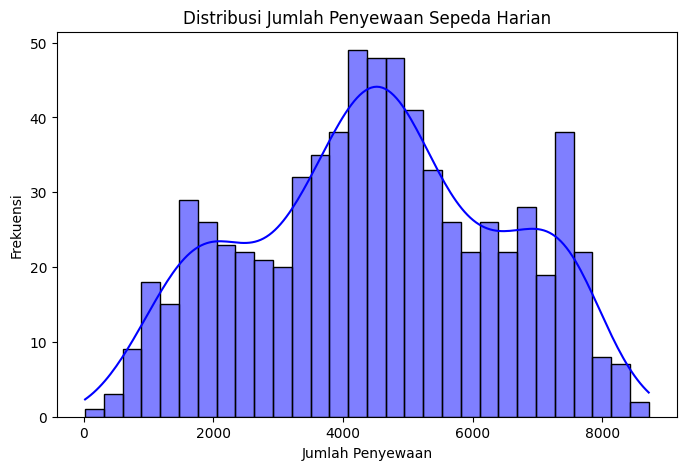

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight:** Data jumlah penyewaan sepeda harian cenderung berdistribusi **normal.**

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda?

### Rata-rata penyewaan sepeda berdasarkan musim

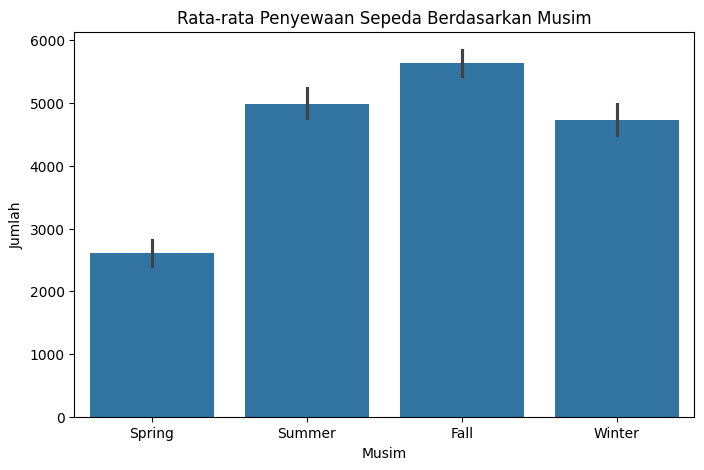

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=day_df)
plt.xticks([0,1,2,3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah")
plt.show()

### Analisis berdasarkan Cuaca

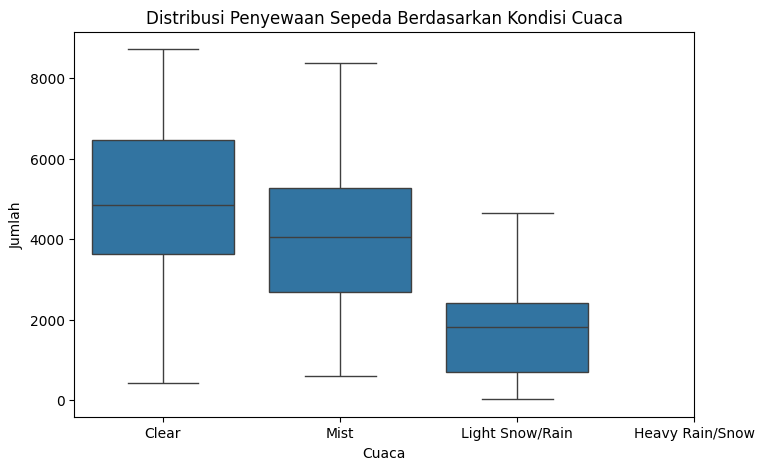

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xticks([0,1,2,3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah")
plt.show()

## Pertanyaan 2: Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

### Total Penyewaan Sepeda: Hari Kerja vs Hari Libur

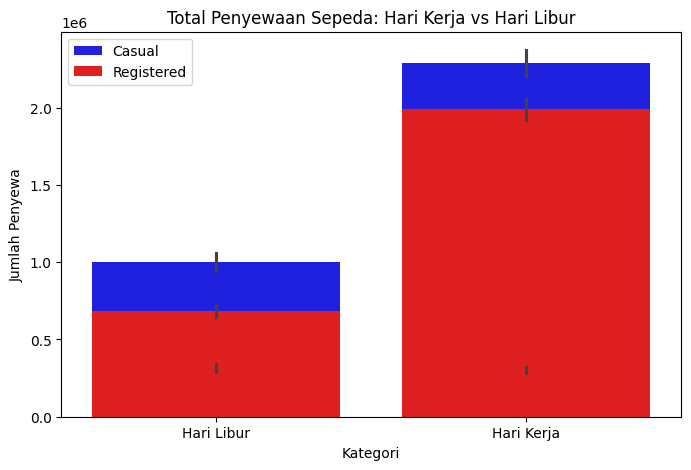

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum, color="blue")  # Total sebagai background
sns.barplot(x='workingday', y='casual', data=day_df, estimator=sum, color="blue", label="Casual")
sns.barplot(x='workingday', y='registered', data=day_df, estimator=sum, color="red", label="Registered")

# Kustomisasi tampilan
plt.title("Total Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xticks([0,1], ['Hari Libur', 'Hari Kerja'])
plt.xlabel("Kategori")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

## Analisis Lanjutan (Opsional)

### Clustering (Binning)

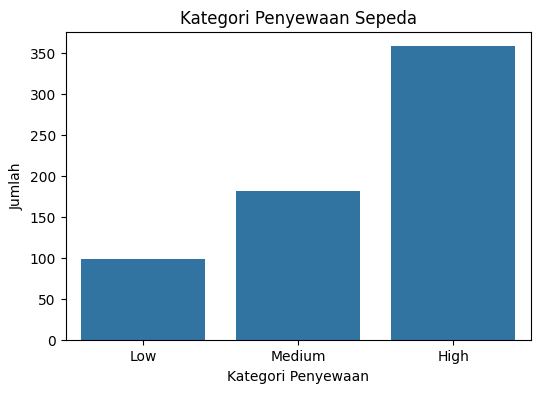

In [ ]:
bins = [0, 2000, 4000, 7000]
labels = ['Low', 'Medium', 'High']
day_df['rental_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x="rental_category", data=day_df)
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah")
plt.title("Kategori Penyewaan Sepeda")
plt.show()

**Insight:** Sebagai analisis tambahan, menggunakan teknik clustering (binning), kita bisa mengelompokkan hari dengan penyewaan rendah, sedang, atau tinggi untuk optimasi layanan.

### RFM Analysis

In [ ]:
# Menentukan Recency (R)
max_date = day_df['dteday'].max()
day_df['Recency'] = (max_date - day_df['dteday']).dt.days

# Menentukan Frequency (F) - total transaksi per hari
day_df['Frequency'] = 1  # Karena setiap baris mewakili satu hari penyewaan

# Menentukan Monetary (M) - total jumlah sepeda yang disewa per hari
day_df['Monetary'] = day_df['cnt']

# Memilih hanya kolom yang diperlukan
rfm_df = day_df[['dteday', 'Recency', 'Frequency', 'Monetary']]

# Menampilkan 5 data teratas
rfm_df.head()

,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,1,985
1,2011-01-02,729,1,801
2,2011-01-03,728,1,1349
3,2011-01-04,727,1,1562
4,2011-01-05,726,1,1600


**Insight:** Sebagai analisis tambahan, RFM Analysis terdiri dari beberapa informasi berikut:
* Recency (R): Seberapa baru pengguna menyewa sepeda terakhir kali.
* Frequency (F): Seberapa sering pengguna menyewa sepeda.
* Monetary (M): Total jumlah sepeda yang disewa oleh pengguna.
Analisis ini juga berfungsi untuk digunakan dalam customer segmentation.

# Conclusion

> Conclution pertanyaan 1
  * Faktor cuaca dan musim berpengaruh terhadap jumlah penyewaan sepeda.
  * Jumlah penyewa paling banyak terjadi pada musim **Fall** dengan total **1.061.129** penyewa dengan rata-rata setiap harinya **5644** penyewa.
  * Selain itu, jumlah penyewa juga paling banyak terjadi pada cuaca **Clear, Few clouds, Partly cloudy, Partly cloudy** dengan total **2.257.952** penyewa dengan rata-rata setiap harinya **4876** penyewa.
  * Pada daily-level, tidak ada penyewa pada cuaca Heavy Rain/Snow

> Conclution pertanyaan 2
*   Hari kerja dan hari libur mempengaruhi penyewaan sepeda secara signifikan
*   Jumlah penyewa sepeda di hari kerja lebih banyak dibandingkan hari libur, yaitu sebanyak **lebih dari 2 juta** penyewa.
* Mayoritas penyewa sepeda tersebut merupakan penyewa berjenis **registered**  



